<a href="https://colab.research.google.com/github/sarahkaarina/basic-stats-training/blob/main/t_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pairwise Comparisons**

*independent sample T-tests*

Let's say you're running a study and you want to find out whether *on average* tuna fish or sharks swim more miles. Your very kind and capable research team and you have carefully tagged 50 individual tuna fish and 50 individual sharks and attached GPS monitoring devices to them.

This GPS devices tells you for each tuna fish and each shark how many miles they swam in a given day.

Now, the question you have is: on day 1, is there a difference in the number of miles a tuna fish swam, compared to a shark?

**Let's breakdown the data**

We have two groups:

  1. Tuna fish (N = 50)
  2. Sharks (N = 50)

For each of these animals (tuna or shark), you also have a number that represents number of miles.

Therefore, we are going to use a t-test to understand whether the average number of miles swam by sharks is different to the average number of miles swam by tuna.

Let's see how that's done!

In [14]:
"""
In this line of code we are going to import our python libraries.
The first two libraries will help us manage (pandas) and handle (numpy) our data.
"""
import pandas as pd
import numpy as np

"""
These next libraries will help us plot and do our stats!
"""
#plot
import matplotlib.pyplot as plt

#do stats
import scipy.stats as stats

# generate random numbers
import random

# let's set a seed as well,
# to maintain the same randomization every time we run the code

random.seed(991)

# I'm going to supress all warnings (for the time being)

import warnings
warnings.filterwarnings('ignore')

**Step 1**

Generate the data

In [15]:
#https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/

# Create an empty dataframe
tuna_data = []
shark_data = []

# Loop over the number of animals in each group (n=100)
for i in range(100):

  # Random.normal will simulate a bunch of NORMALLY DISTRIBUTED integers
  # We center around a fake mean (loc) and provide a fake standard deviation (scale)

  # We are also going to simulate it so sharks swam the most and tuna the least
  tuna = np.random.normal(loc = 50, scale = 2, size = 1)
  shark = np.random.normal(loc = 55, scale = 2, size = 1)

  # Round our values to ceiling value

  tuna = int(tuna)
  shark = int(shark)

  data_dict = {"tuna" : tuna, "shark" : shark}

  # Store our data in our empty dfs
  tuna_data.append(data_dict["tuna"])
  shark_data.append(data_dict["shark"])

  # Create our pandas dfs
  tuna_df = pd.DataFrame({'group' : 'tuna',
                          'number_of_miles_swam': tuna_data})
  shark_df = pd.DataFrame({'group' : 'shark',
                          'number_of_miles_swam': shark_data})

# Finally we create a pandas dataframes (with column names etc.) using pandas

fake_mileage_data_df = pd.concat([tuna_df, shark_df])

Let's check the data!

In [4]:
fake_mileage_data_df.head()

,group,number_of_miles_swam
0,tuna,46
1,tuna,45
2,tuna,46
3,tuna,48
4,tuna,48


**Step 2**

Visualize the data

<Figure size 640x480 with 0 Axes>

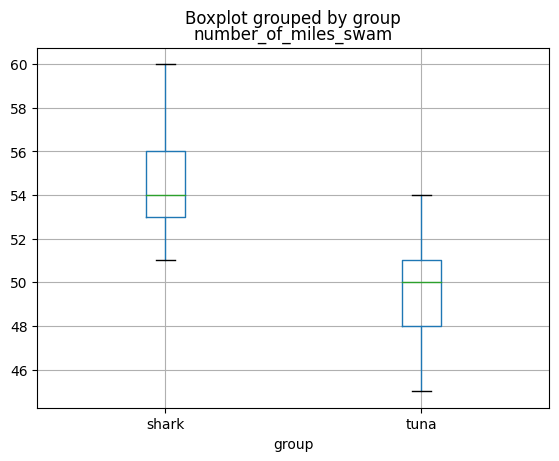

In [16]:
# Create the empty figure in which to store out plot
fig = plt.figure() # <-- edit figure sizes and other specs in here

# Create a box plot from our data
fake_mileage_data_df.boxplot(column = "number_of_miles_swam", by = "group")

# Show plot
plt.show()

**Step 3**

Check our assumptions

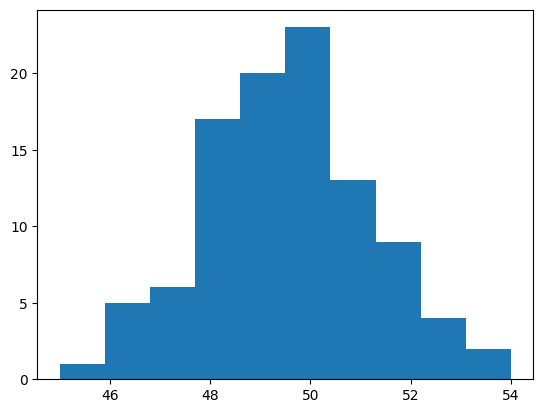

NormaltestResult(statistic=0.0913809949116686, pvalue=0.9553375958551233)


In [17]:
# Plot our distribution
#fig = plt.figure()
plt.hist(tuna_df["number_of_miles_swam"])
plt.show()

# Test normality in the dog group
print(stats.normaltest(tuna_df["number_of_miles_swam"]))


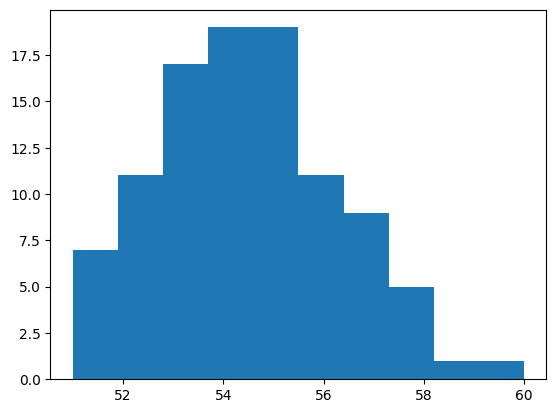

NormaltestResult(statistic=2.1535999272120496, pvalue=0.34068398431106756)


In [18]:
# Plot our distribution
#fig = plt.figure()
plt.hist(shark_df["number_of_miles_swam"])
plt.show()

# Test normality in the dog group
print(stats.normaltest(shark_df["number_of_miles_swam"]))

In [21]:
# Testing Homogeneity of Variance

stats.levene(tuna_df["number_of_miles_swam"],
               shark_df["number_of_miles_swam"])

LeveneResult(statistic=0.39777519508550624, pvalue=0.5289677711921958)

**Step 4**

Run our model

In [20]:
# Run our t-test

stats.ttest_ind(a=tuna_data, b=shark_data, equal_var=True)

TtestResult(statistic=-17.780117837346438, pvalue=6.772171216893072e-43, df=198.0)